In [1]:
path<- "C:/Users/Martin/Documents/Tareas UNISON/Termodinamica/Laboratorio/Informe 4/a/Datos"
setwd(path)

In [2]:
library("ggplot2")
library("reshape2")
library("dplyr")
library("plotly")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [3]:
D <- read.csv("All.csv" ,header=TRUE, sep="," , stringsAsFactors=FALSE)
head(D,8)

Tiempo...s..,T...K..,V...m3..,P...kPa..
0.0,298.891,9.505e-05,204.535
0.1,298.890,9.508e-05,204.474
0.2,298.889,9.506e-05,204.535
0.3,298.889,9.508e-05,204.474
0.4,298.889,9.508e-05,204.413
0.5,298.889,9.508e-05,204.413
0.6,298.889,9.508e-05,204.352
0.7,298.887,9.508e-05,204.230


In [4]:
names(D)[names(D)=="Tiempo...s.."] <- "Tiempo"
names(D)[names(D)=="T...K.."] <- "T"
names(D)[names(D)=="V...m3.."] <- "V"
names(D)[names(D)=="P...kPa.."] <- "P"
tail(D,5)

,Tiempo,T,V,P
381,38.0,298.809,0.0001968,101.077
382,38.1,298.811,0.0001969,101.138
383,38.2,298.813,0.0001969,101.199
384,38.3,298.814,0.0001969,101.321
385,38.4,298.816,0.0001969,101.382


In [5]:
str(D)
summary(D)

'data.frame':	385 obs. of  4 variables:
 $ Tiempo: num  0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
 $ T     : num  299 299 299 299 299 ...
 $ V     : num  9.51e-05 9.51e-05 9.51e-05 9.51e-05 9.51e-05 ...
 $ P     : num  205 204 205 204 204 ...


     Tiempo           T               V                   P        
 Min.   : 0.0   Min.   :298.8   Min.   :9.505e-05   Min.   :101.1  
 1st Qu.: 9.6   1st Qu.:298.8   1st Qu.:1.258e-04   1st Qu.:113.3  
 Median :19.2   Median :298.8   Median :1.503e-04   Median :130.7  
 Mean   :19.2   Mean   :298.8   Mean   :1.495e-04   Mean   :136.3  
 3rd Qu.:28.8   3rd Qu.:298.8   3rd Qu.:1.748e-04   3rd Qu.:154.5  
 Max.   :38.4   Max.   :298.9   Max.   :1.969e-04   Max.   :204.5  

In [7]:
#Incertidumbre por repetibilidad
n = 385
T <- D$T
MT <- mean(D$T)
sumT <- sum((T-MT)^2)
raizT =sqrt((1/(n-1))*sumT)
deltaT <- raizT/(sqrt(n))
deltaT
MT

[1] 0.0007603247

[1] 298.8157

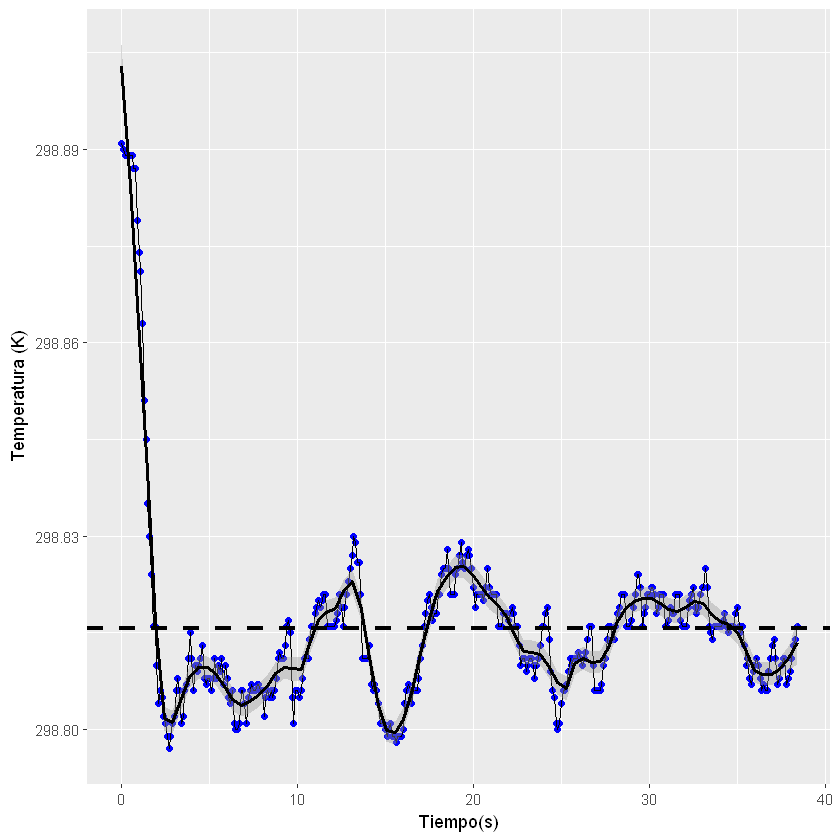

In [8]:
#MT <- mean(D$T)
k<-ggplot(D, aes(x=Tiempo,y=T)) +
#theme_bw() +
geom_point(col="blue") + 
geom_line(col="black")+
stat_smooth(method = "loess", span=0.1,colour="black")+
geom_hline(aes(yintercept = MT), linetype= "dashed", size =1.25)+
labs( x="Tiempo(s)", y="Temperatura (K)")
#ggplotly(k)
k

In [6]:
V_0 <- D$V[1]
VV <- D$V / V_0
lnV <- log(VV)
DN <- mutate(D, lnV= lnV)
head(DN,5)

Tiempo,T,V,P,lnV
0.0,298.891,9.505e-05,204.535,0.0000000000
0.1,298.890,9.508e-05,204.474,0.0003155736
0.2,298.889,9.506e-05,204.535,0.0001052023
0.3,298.889,9.508e-05,204.474,0.0003155736
0.4,298.889,9.508e-05,204.413,0.0003155736


In [9]:
nR <- (D$V * D$P)/(D$T)
DN <- mutate(DN, nR=nR)
head(DN,5)

Tiempo,T,V,P,lnV,nR
0.0,298.891,9.505e-05,204.535,0.0000000000,6.504395e-05
0.1,298.890,9.508e-05,204.474,0.0003155736,6.504529e-05
0.2,298.889,9.506e-05,204.535,0.0001052023,6.505123e-05
0.3,298.889,9.508e-05,204.474,0.0003155736,6.504551e-05
0.4,298.889,9.508e-05,204.413,0.0003155736,6.502611e-05


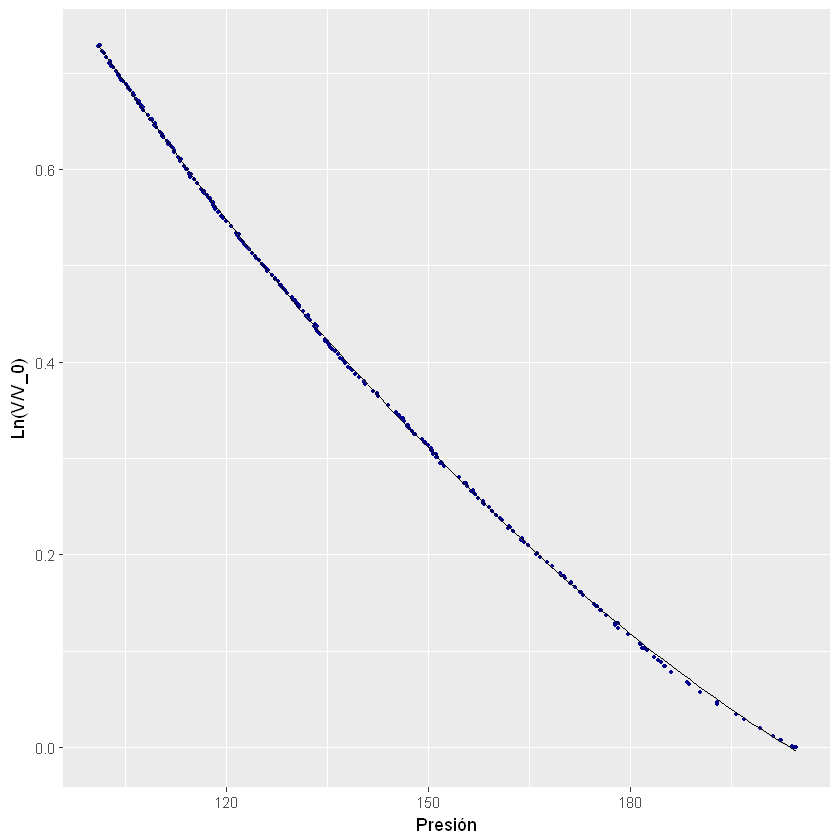

In [7]:
p <- ggplot(DN,aes(x=P,y=lnV)) +
     geom_point(size=0.75, color="dark blue") +
     #geom_line(col= "blue", size=0.75)
     stat_smooth(method = "loess",colour="black", size=0.25,
            fullrange=TRUE, se=TRUE)+
     labs(x="Presión", y="Ln(V/V_0)")
#ggplotly(p)
p

In [ ]:
smooth_vals = predict(loess(P~lnV,D), D$lnV)
smooth_vals

In [ ]:
stat_smooth(method = "loess",colour="blue", formula = y ~ 1/x, fullrange=FALSE, se=FALSE)

In [10]:
DN<- mutate(DN,P2)
names(DN)[names(DN)=="P2"] <- "Logaritmica(lnV)"
DN

ERROR: Error in mutate_impl(.data, dots): binding not found: 'P2'


In [ ]:
ggplot(data,aes(x=P1,y=P2))+ geom_line(size=2)
#geom_line(x=P,y=lnV)

In [ ]:
Newdata= data.frame(DN[4],DN[5],DN[6])
Newdata
Newdata = melt(Newdata, id="P")
Newdata

In [ ]:
names(Newdata)

In [ ]:
p <- ggplot(Newdata,aes(x=P, y=value, colour=variable)) +
     geom_line(size=0.75) +
     #geom_line(col= "blue", size=0.75)
     #stat_smooth(method = "loess",colour="black", size=0.25,
     #       fullrange=TRUE, se=TRUE)+
     labs(x="Presión", y="Ln(V/V_0)")
#ggplotly(p)
p

In [ ]:
dp <- ggplot(DN, aes(x=Tiempo,y=nR)) + 
geom_point()+
theme_bw()+
stat_smooth(method = "loess",colour="black", size=0.75, formula= y~x,
             se=TRUE)+
labs(x="Tiempo (s)" , y="PV/T")
#ggplotly(dp)
dp

In [ ]:
summary(DN$nR)
sd(DN$nR)

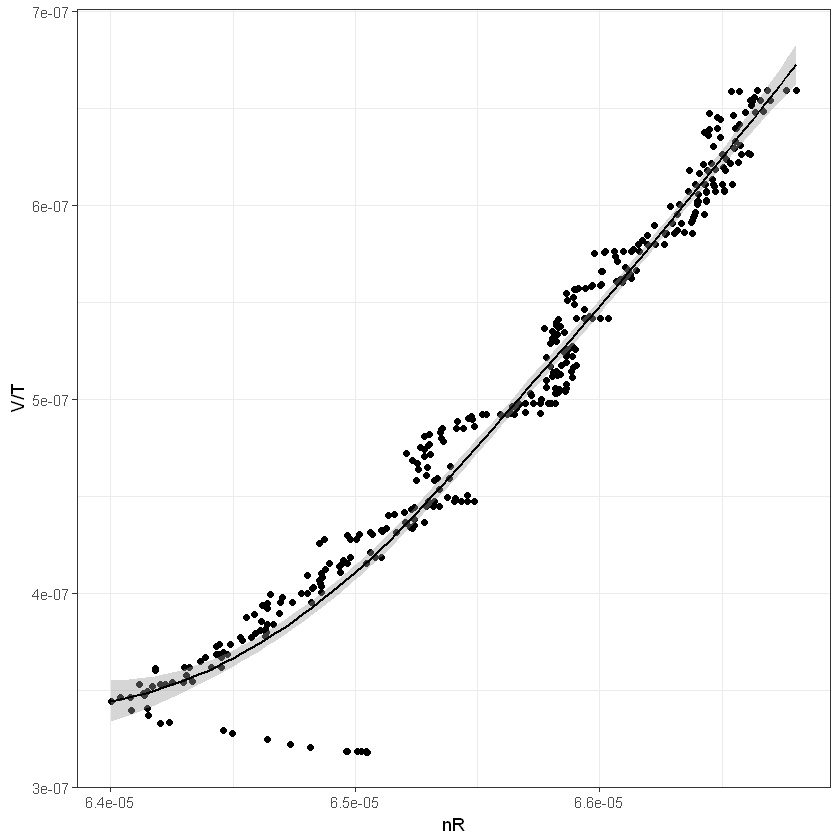

In [12]:
dz <- ggplot(DN, aes(x=nR,y=V/T)) + 
geom_point()+
theme_bw()+
stat_smooth(method = "loess",colour="black", size=0.75, formula= y~x,
             se=TRUE)+
labs(x="nR" , y="V/T")
#ggplotly(dz)
dz

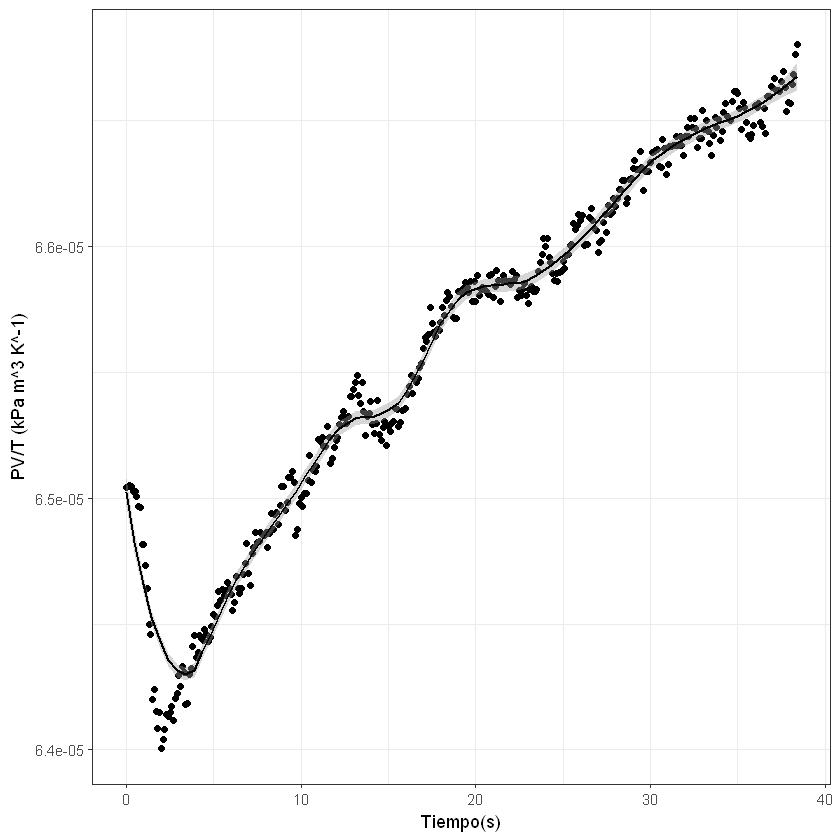

In [14]:
dh <- ggplot(DN, aes(x=Tiempo,y=nR)) + 
geom_point()+
theme_bw()+
stat_smooth(method = "loess",colour="black", size=0.75, span= 0.25,
             se=TRUE)+
labs(x="Tiempo(s)" , y="PV/T (kPa m^3 K^-1)")
dh

In [16]:
z <- diff(DN$lnV) / diff(DN$P)
sum(z, na.rm=TRUE)
#z[385]<- 0

#k <- z**(1/(DN$V))
#z
#z
summary(z)
#str(DN)

[1] NaN

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     -Inf -0.007974 -0.005540       NaN  0.000000       Inf        20 

In [ ]:
jk <- 1/DN$P
rrr <- data.frame(z, jk)
rrr[3] <-rrr[2]-rrr[1]
rrr[4] <- DN$Tiempo
summary(rrr)

In [ ]:
pdiffv <- data.frame(DN[4],z)
tail(pdiffv,5)

In [ ]:
ggplot(rrr, aes(x=V4, y=jk.1))+ geom_point()+geom_line()


In [ ]:
z<- seq(204.5350,101.3820,along.with=D$T)
k<--1.0626*log(z)+5.5675
z

In [ ]:
P1 <- c(z)
P2 <- c(k)
data <- data.frame(P1,P2)
data